In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('earthquakes_nepal_Scraped.csv')

In [3]:
df_cleaned = df.copy()

In [4]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1272 non-null   object 
 1   time       1272 non-null   object 
 2   latitude   1272 non-null   object 
 3   longitude  1272 non-null   object 
 4   magnitude  1272 non-null   float64
 5   epicenter  1272 non-null   object 
dtypes: float64(1), object(5)
memory usage: 62.8+ KB


In [5]:
df_cleaned.isnull().sum()

date         64
time         64
latitude     64
longitude    64
magnitude    64
epicenter    64
dtype: int64

In [6]:
df_cleaned.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1272 non-null   object 
 1   time       1272 non-null   object 
 2   latitude   1272 non-null   object 
 3   longitude  1272 non-null   object 
 4   magnitude  1272 non-null   float64
 5   epicenter  1272 non-null   object 
dtypes: float64(1), object(5)
memory usage: 62.8+ KB


- In total there is 1259 row of data 
#Need to Change
    - Date is in object (Need to seprate the BS and AD ) - Time series 
    - Time is in object (Need to seprate the local and UTC) - Time Series
    - latitude and longitude to float64
    

In [8]:
mask = (
    df_cleaned["latitude"].astype(str).str.match(r"^-?\d+(\.\d+)?$") &
    df_cleaned["longitude"].astype(str).str.match(r"^-?\d+(\.\d+)?$")
)


In [9]:
df_cleaned[~mask]

,date,time,latitude,longitude,magnitude,epicenter
52,B.S.: 2080-07-21A.D.: 2023-11-07,Local: 12:58UTC: 07:13,29:83,81:71,4.0,Bajura
1204,B.S.: 2055-11-07A.D.: 1999-02-19,Local: 05:25UTC: 23:40,29.87,80..62,4.6,Darchula
1245,B.S.: 2053-10-18A.D.: 1997-01-31,Local: 02:27UTC: 20:42,28:03,85.33,4.2,Rasuwa


In [10]:
mask.all()


np.False_

In [11]:
def clean_coordinate(series):
    return (
        series
        .astype(str)
        # replace comma, colon, ellipsis, multiple dots → single dot
        .str.replace(r"[,:…]", ".", regex=True)
        .str.replace(r"\.{2,}", ".", regex=True)
        .str.strip()
        # convert to numeric
        .pipe(pd.to_numeric, errors="coerce")
    )

df_cleaned["latitude"] = clean_coordinate(df_cleaned["latitude"])
df_cleaned["longitude"] = clean_coordinate(df_cleaned["longitude"])

In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 1 to 1335
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1272 non-null   object 
 1   time       1272 non-null   object 
 2   latitude   1272 non-null   float64
 3   longitude  1272 non-null   float64
 4   magnitude  1272 non-null   float64
 5   epicenter  1272 non-null   object 
dtypes: float64(3), object(3)
memory usage: 69.6+ KB


In [13]:
df_cleaned['magnitude'].isnull().sum()

np.int64(0)

In [14]:
mask_mag = (
    df_cleaned["magnitude"].astype(str).str.match(r"^-?\d+(\.\d+)?$")
)


In [15]:
df_cleaned[~mask_mag]

,date,time,latitude,longitude,magnitude,epicenter


In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 1 to 1335
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1272 non-null   object 
 1   time       1272 non-null   object 
 2   latitude   1272 non-null   float64
 3   longitude  1272 non-null   float64
 4   magnitude  1272 non-null   float64
 5   epicenter  1272 non-null   object 
dtypes: float64(3), object(3)
memory usage: 69.6+ KB


In [17]:
df_cleaned.sample(5)

,date,time,latitude,longitude,magnitude,epicenter
565,B.S.: 2072-02-15A.D.: 2015-05-29,Local: 14:15UTC: 8:30 AM,28.17,84.72,4.0,Gorkha
251,B.S.: 2076-05-29A.D.: 2019-09-15,Local: 10:54UTC: 05:09,30.30,81.74,5.0,Humla
1193,B.S.: 2056-12-04A.D.: 2000-03-17,Local: 10:43UTC: 4:58,27.76,87.55,4.2,Sankhuwasabha
321,B.S.: 2074-06-05A.D.: 2017-09-21,Local: 13:04UTC: 07:19,27.62,86.25,4.6,Dolakha
1055,B.S.: 2065-02-07A.D.: 2008-05-20,Local: 00:55UTC: 19:10,28.33,83.33,4.3,Baglung


In [18]:
pattern = r"^B\.S\.\:\s\d{4}-\d{2}-\d{2}A\.D\.\:\s\d{4}-\d{2}-\d{2}$"


In [19]:
valid_mask = df_cleaned["date"].astype(str).str.match(pattern)

valid_mask.all()


np.True_

In [20]:
df_cleaned[~valid_mask][["date"]]


,date


In [21]:
pattern = r"^Local\:\s\d{2}:\d{2}UTC\:\s\d{2}:\d{2}$"


In [22]:
valid_mask = df_cleaned["time"].astype(str).str.match(pattern)

valid_mask.all()


np.False_

In [23]:
df_cleaned.loc[~valid_mask, ["time"]]


,time
313,Local: 13:30UTC: 7:45
326,Local: 10:20UTC: 4:35
329,Local: 09:27UTC: 3:42
331,Local: 11:23UTC: 5:38
373,Local: 11:17UTC: 5:32
...,...
1316,Local: 12:00UTC: 6:15
1320,Local: 12:18UTC: 6:33
1323,Local: 14:26UTC: 8:41
1328,Local: 13:35UTC: 7:50


In [24]:
import pandas as pd
import re
import numpy as np

def normalize_time(series):
    def fix(val):
        if pd.isna(val):
            return np.nan

        s = str(val)

        # normalize spacing & keywords
        s = re.sub(r"\s+", " ", s)
        s = re.sub(r"Local\s*[:\-]?\s*", "Local: ", s)
        s = re.sub(r"UTC\s*[:\-]?\s*", "UTC: ", s)

        # handle explicit missing UTC
        if re.search(r"UTC:\s*(N/A|NA|null)", s, re.IGNORECASE):
            m = re.search(r"Local:\s*(\d{1,2}:\d{2})", s)
            if not m:
                return np.nan

            local_t = m.group(1)
            local_dt = pd.to_datetime(local_t, format="%H:%M", errors="coerce")
            local_t = local_dt.strftime("%H:%M") if pd.notna(local_dt) else local_t

            return f"Local: {local_t}UTC: NaN"

        # extract normal times
        m = re.search(
            r"Local:\s*(\d{1,2}:\d{2})\s*UTC:\s*(\d{1,2}:\d{2})(?:\s*(AM|PM))?",
            s,
            re.IGNORECASE
        )

        if not m:
            return np.nan

        local_t, utc_t, ampm = m.groups()

        # normalize local time
        local_dt = pd.to_datetime(local_t, format="%H:%M", errors="coerce")
        local_t = local_dt.strftime("%H:%M") if pd.notna(local_dt) else local_t

        # normalize UTC time
        if ampm:
            utc_dt = pd.to_datetime(
                f"{utc_t} {ampm}",
                format="%I:%M %p",
                errors="coerce"
            )
        else:
            utc_dt = pd.to_datetime(utc_t, format="%H:%M", errors="coerce")

        utc_t = utc_dt.strftime("%H:%M") if pd.notna(utc_dt) else np.nan

        return f"Local: {local_t}UTC: {utc_t}"

    return series.apply(fix)

df_cleaned["time"] = normalize_time(df_cleaned["time"])

In [25]:
valid_mask = df_cleaned["time"].astype(str).str.match(pattern)

valid_mask.all()
df_cleaned.loc[~valid_mask, ["time"]]

,time
1298,Local: 11:00UTC: NaN


In [26]:
df_cleaned.loc[~valid_mask, ["time"]]

,time
1298,Local: 11:00UTC: NaN


In [27]:
df_cleaned["date_ad"] = df_cleaned["date"].str.extract(
    r"A\.D\.\:\s*(\d{4}-\d{2}-\d{2})"
)

In [28]:
df_cleaned["date_bs"] = df_cleaned["date"].str.extract(
    r"B\.S\.\:\s*(\d{4}-\d{2}-\d{2})"
)


In [29]:
df_cleaned["local_time"] = df_cleaned["time"].str.extract(
    r"Local\:\s*(\d{2}:\d{2})"
)


In [30]:
df_cleaned["utc_time"] = df_cleaned["time"].str.extract(
    r"UTC\:\s*(\d{2}:\d{2})"
)


In [31]:
df_cleaned["datetime_local"] = pd.to_datetime(
    df_cleaned["date_ad"] + " " + df_cleaned["local_time"],
    format="%Y-%m-%d %H:%M",
    errors="coerce"
)


In [32]:
df_cleaned["datetime_utc"] = pd.to_datetime(
    df_cleaned["date_ad"] + " " + df_cleaned["utc_time"],
    format="%Y-%m-%d %H:%M",
    errors="coerce",
    utc=True
)


In [33]:
df_cleaned["datetime_npt"] = df_cleaned["datetime_utc"].dt.tz_convert("Asia/Kathmandu")


In [34]:
df_cleaned.dtypes

date                                      object
time                                      object
latitude                                 float64
longitude                                float64
magnitude                                float64
epicenter                                 object
date_ad                                   object
date_bs                                   object
local_time                                object
utc_time                                  object
datetime_local                    datetime64[ns]
datetime_utc                 datetime64[ns, UTC]
datetime_npt      datetime64[ns, Asia/Kathmandu]
dtype: object

# Check if the time in utc is match the local time or not 

In [35]:
df_cleaned.tail(2)

,date,time,latitude,longitude,magnitude,epicenter,date_ad,date_bs,local_time,utc_time,datetime_local,datetime_utc,datetime_npt
1334,B.S.: 2051-01-20A.D.: 1994-05-03,Local: 00:30UTC: 18:45,28.52,83.03,4.4,Baglung,1994-05-03,2051-01-20,00:30,18:45,1994-05-03 00:30:00,1994-05-03 18:45:00+00:00,1994-05-04 00:30:00+05:45
1335,B.S.: 2050-11-24A.D.: 1994-03-08,Local: 07:50UTC: 02:05,29.33,81.83,4.0,Kalikot,1994-03-08,2050-11-24,07:50,02:05,1994-03-08 07:50:00,1994-03-08 02:05:00+00:00,1994-03-08 07:50:00+05:45


In [36]:
df_cleaned = (
    df_cleaned
    .sort_values("datetime_utc")  # Sorts the DataFrame by the 'datetime_utc' column in ascending order
    .drop_duplicates(
        subset=["datetime_utc", "latitude", "longitude"],  # Identifies duplicates based on these columns
        keep="first"  # Keeps the first occurrence of each duplicate group and removes the rest
    )
    .reset_index(drop=True)  # Resets the index after dropping rows, dropping the old index
)

In [37]:
df_cleaned = (
    df_cleaned
    .sort_values("datetime_utc")
    .drop_duplicates(
        subset=["datetime_utc", "latitude", "longitude"],
        keep="first"
    )
    .reset_index(drop=True)
)


In [38]:
df_cleaned[df_cleaned['datetime_utc'].isnull()]

,date,time,latitude,longitude,magnitude,epicenter,date_ad,date_bs,local_time,utc_time,datetime_local,datetime_utc,datetime_npt
1244,B.S.: 2051-10-16A.D.: 1995-01-30,Local: 11:00UTC: NaN,29.38,82.3,4.0,Jumla,1995-01-30,2051-10-16,11:00,NaN,1995-01-30 11:00:00,NaT,NaT


In [39]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype                         
---  ------          --------------  -----                         
 0   date            1245 non-null   object                        
 1   time            1245 non-null   object                        
 2   latitude        1245 non-null   float64                       
 3   longitude       1245 non-null   float64                       
 4   magnitude       1245 non-null   float64                       
 5   epicenter       1245 non-null   object                        
 6   date_ad         1245 non-null   object                        
 7   date_bs         1245 non-null   object                        
 8   local_time      1245 non-null   object                        
 9   utc_time        1244 non-null   object                        
 10  datetime_local  1245 non-null   datetime64[ns]                
 11  date

In [40]:
idx = 1244

# Build local datetime
dt_local = pd.to_datetime(
    f"{df_cleaned.loc[idx, 'date_ad']} {df_cleaned.loc[idx, 'local_time']}",
    errors="coerce"
)

if pd.notna(dt_local):
    # Timezone-aware conversions
    dt_npt = dt_local.tz_localize("Asia/Kathmandu")
    dt_utc = dt_npt.tz_convert("UTC")

    # Update columns (ONLY this row)
    df_cleaned.loc[idx, "datetime_local"] = dt_local
    df_cleaned.loc[idx, "datetime_utc"] = dt_utc
    df_cleaned.loc[idx, "datetime_npt"] = dt_npt

    df_cleaned.loc[idx, "utc_time"] = dt_utc.strftime("%H:%M")
    df_cleaned.loc[idx, "local_time"] = dt_local.strftime("%H:%M")

    # Optional: rebuild the combined time string
    df_cleaned.loc[idx, "time"] = (
        f"Local: {dt_local.strftime('%H:%M')}"
        f"UTC: {dt_utc.strftime('%H:%M')}"
    )


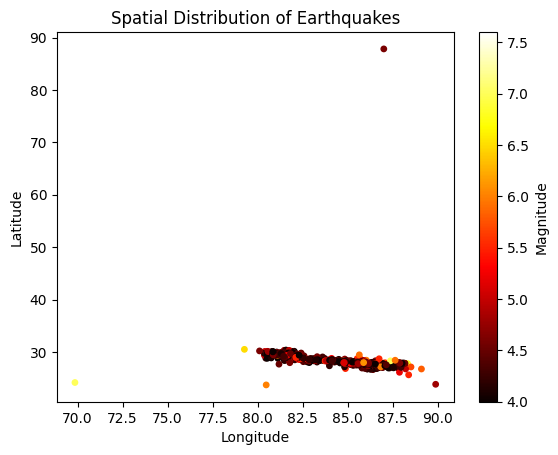

In [41]:
plt.scatter(
    df_cleaned["longitude"],
    df_cleaned["latitude"],
    c=df_cleaned["magnitude"],
    cmap="hot",
    s=15
)
plt.colorbar(label="Magnitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of Earthquakes")
plt.show()


- There is some outlier or mistake so after see the map i find that the Sankhuwasabha has the mistaken point

In [42]:
df_cleaned[df_cleaned['epicenter']=="Sankhuwasabha"]

,date,time,latitude,longitude,magnitude,epicenter,date_ad,date_bs,local_time,utc_time,datetime_local,datetime_utc,datetime_npt
92,B.S.: 2054-08-12A.D.: 1997-11-27,Local: 21:57UTC: 16:12,27.74,87.00,5.5,Sankhuwasabha,1997-11-27,2054-08-12,21:57,16:12,1997-11-27 21:57:00,1997-11-27 16:12:00+00:00,1997-11-27 21:57:00+05:45
93,B.S.: 2054-08-23A.D.: 1997-12-08,Local: 07:48UTC: 02:03,27.94,87.07,5.6,Sankhuwasabha,1997-12-08,2054-08-23,07:48,02:03,1997-12-08 07:48:00,1997-12-08 02:03:00+00:00,1997-12-08 07:48:00+05:45
105,B.S.: 2055-05-21A.D.: 1998-09-06,Local: 03:20UTC: 21:35,87.84,87.00,4.6,Sankhuwasabha,1998-09-06,2055-05-21,03:20,21:35,1998-09-06 03:20:00,1998-09-06 21:35:00+00:00,1998-09-07 03:20:00+05:45
118,B.S.: 2056-12-04A.D.: 2000-03-17,Local: 10:43UTC: 04:58,27.76,87.55,4.2,Sankhuwasabha,2000-03-17,2056-12-04,10:43,04:58,2000-03-17 10:43:00,2000-03-17 04:58:00+00:00,2000-03-17 10:43:00+05:45
148,B.S.: 2059-03-32A.D.: 2002-07-16,Local: 00:24UTC: 18:39,27.75,87.36,4.3,Sankhuwasabha,2002-07-16,2059-03-32,00:24,18:39,2002-07-16 00:24:00,2002-07-16 18:39:00+00:00,2002-07-17 00:24:00+05:45
304,B.S.: 2067-11-01A.D.: 2011-02-13,Local: 23:36UTC: 17:51,27.47,87.01,4.7,Sankhuwasabha,2011-02-13,2067-11-01,23:36,17:51,2011-02-13 23:36:00,2011-02-13 17:51:00+00:00,2011-02-13 23:36:00+05:45
305,B.S.: 2067-11-10A.D.: 2011-02-22,Local: 01:29UTC: 19:44,27.57,87.01,4.2,Sankhuwasabha,2011-02-22,2067-11-10,01:29,19:44,2011-02-22 01:29:00,2011-02-22 19:44:00+00:00,2011-02-23 01:29:00+05:45
318,B.S.: 2068-03-04A.D.: 2011-06-18,Local: 23:16UTC: 17:31,27.83,87.35,4.3,Sankhuwasabha,2011-06-18,2068-03-04,23:16,17:31,2011-06-18 23:16:00,2011-06-18 17:31:00+00:00,2011-06-18 23:16:00+05:45
319,B.S.: 2068-03-31A.D.: 2011-07-15,Local: 01:44UTC: 19:59,27.28,87.30,4.5,Sankhuwasabha,2011-07-15,2068-03-31,01:44,19:59,2011-07-15 01:44:00,2011-07-15 19:59:00+00:00,2011-07-16 01:44:00+05:45
968,B.S.: 2075-05-13A.D.: 2018-08-29,Local: 23:35UTC: 17:50,27.79,87.41,4.2,Sankhuwasabha,2018-08-29,2075-05-13,23:35,17:50,2018-08-29 23:35:00,2018-08-29 17:50:00+00:00,2018-08-29 23:35:00+05:45


In [43]:
df_cleaned.loc[105, 'latitude'] = 27.84

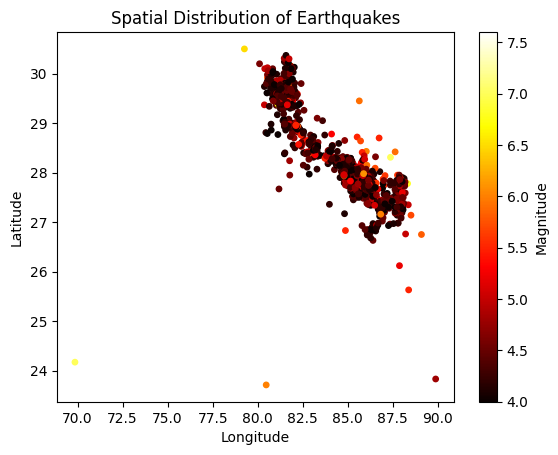

In [44]:
plt.scatter(
    df_cleaned["longitude"],
    df_cleaned["latitude"],
    c=df_cleaned["magnitude"],
    cmap="hot",
    s=15
)
plt.colorbar(label="Magnitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of Earthquakes")
plt.show()


In [45]:
lists = []
lists.append(df_cleaned['epicenter'].unique())
print(len(lists[0]))
lists[0].sort()
lists


131


[array(['Achham', 'Around Annapurna II (Border of Kaski and Manang)',
        'Baglung', 'Baitadi', 'Bajhang', 'Bajhang*', 'Bajura', 'Bajura*',
        'Bangaladesh', 'Bangladesh', 'Banke', 'Bardiya', 'Bhajhang',
        'Bhaktapur', 'Bhojpur', 'Bhojpur*', 'Bhuj,India', 'Bihar',
        'Binnaguri, India', 'Chamauli,India', 'Chitwan/Bihar',
        'Dadeldhura', 'Dailekh', 'Darchula', 'Darchula-India Border',
        'Darchula/India', 'Dhading', 'Dhading*', 'Dhankuta', 'Dhanusa',
        'Dhanusha', 'Dharchula', 'Dinggye, China', 'Dolakaha', 'Dolakha',
        'Dolakha*', 'Dolakha/Tibet', 'Dolpa', 'Doti', 'Gorkha', 'Gorkha*',
        'Gorkha/ Tibet', 'Gulmi', 'Humla', 'Humla*', 'Ilam', 'Illam',
        'India', 'JaJarkot', 'Jajarkot', 'Jajarkot*', 'Jhapa/India',
        'Jumla', 'Kailali', 'Kalikot', 'Kanchanpur', 'Kaski', 'Kathmandu',
        'Kavrepalanchok', 'Kavrepalanchok*', 'Khotang', 'Khotang*',
        'Lalitpur', 'Lalitput', 'Lamjung', 'Lamjung*', 'Mahottari',
        'Makawan

# Epicenter (Miss spelled)
- Bangaladesh -> Bangladesh
- Dhanusa -> Dhanusha
- Dolakaha -> Dolakha
- Illam -> Ilam
- JaJarkot -> Jajarkot
- Lalitput -> Lalitpur
- Ramechap -> Ramechhap
- Sankhuwasava -> Sankhuwasabha
- Sankhuwasava* -> Sankhuwasabha*
- Sidhupalchowk,Sindhupalchowk,Sindupalchok,Sindupalchowk -> Sindhupalchok
- Sidhupalchowk/ Tibet,Sindhupalchowk/Tibet -> 
- Sindhupalchowk* -> Sindhupalchok*
- Sindhupalchowk/Tibet* -> Sindhupalchok/Tibet
- Terhathum -> Tehrathum 

In [46]:
import re

epicenter_corrections = {
    r"\bBangaladesh\b": "Bangladesh",
    r"\bDhanusa\b": "Dhanusha",
    r"\bDolakaha\b": "Dolakha",
    r"\bIllam\b": "Ilam",
    r"\bJaJarkot\b": "Jajarkot",
    r"\bLalitput\b": "Lalitpur",
    r"\bRamechap\b": "Ramechhap",
    r"\bSankhuwasava\*?\b": "Sankhuwasabha*",
    r"\bSankhuwasabha\b": "Sankhuwasabha",
    r"\bSidhupalchowk\b": "Sindhupalchok",
    r"\bSindhupalchowk\b": "Sindhupalchok",
    r"\bSindupalchok\b": "Sindhupalchok",
    r"\bSindupalchowk\b": "Sindhupalchok",
    r"\bSindhupalchowk\*": "Sindhupalchok*",
    r"\bSidhupalchowk/Tibet\b": "Sindhupalchok/Tibet",
    r"\bSindhupalchowk/Tibet\b": "Sindhupalchok/Tibet",
    r"\bSindhupalchowk/Tibet\*": "Sindhupalchok/Tibet",
    r"\bTerhathum\b": "Tehrathum",
}


In [47]:
def normalize_epicenter(series):
    s = series.astype(str).str.strip()

    for pattern, replacement in epicenter_corrections.items():
        s = s.str.replace(pattern, replacement, regex=True)

    return s

df_cleaned["epicenter"] = normalize_epicenter(df_cleaned["epicenter"])


In [48]:
lists = []
lists.append(df_cleaned['epicenter'].unique())

lists[0].sort()
len(lists[0])

117

In [49]:
df_export = df_cleaned.copy()

tz_cols = [
    "datetime_utc",
    "datetime_npt"
]

for col in tz_cols:
    df_export[col] = df_export[col].dt.tz_localize(None)


In [50]:
df_export["timezone"] = np.where(
    df_cleaned["datetime_utc"].notna(), "UTC", "Asia/Kathmandu"
)


In [51]:
with pd.ExcelWriter(
    "earthquake_Nepal_Cleaned.xlsx",
    engine="xlsxwriter",
    datetime_format="yyyy-mm-dd hh:mm:ss"
) as writer:
    df_export.to_excel(writer, index=False)


In [53]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype                         
---  ------          --------------  -----                         
 0   date            1245 non-null   object                        
 1   time            1245 non-null   object                        
 2   latitude        1245 non-null   float64                       
 3   longitude       1245 non-null   float64                       
 4   magnitude       1245 non-null   float64                       
 5   epicenter       1245 non-null   object                        
 6   date_ad         1245 non-null   object                        
 7   date_bs         1245 non-null   object                        
 8   local_time      1245 non-null   object                        
 9   utc_time        1245 non-null   object                        
 10  datetime_local  1245 non-null   datetime64[ns]                
 11  date